In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/81 (2).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/58 (11).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/94 (3).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/97 (30).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/93 (1).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/68 (12).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/91 (31).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/91 (35).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/80 (5).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/89 (1).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/88 (6).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/93 (34).jp

In [24]:
pip install tensorflow opencv-python numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Dataset Introduction
## Brain Stroke CT Image Dataset
The dataset used in this project is titled "brain-stroke-ct-image-dataset", which consists of brain CT scan images organized into two distinct categories: Normal and Stroke. These images are stored within a parent folder named Brain_Data_Organised, which contains:

- Normal: CT images of individuals with no signs of stroke.

- Stroke: CT images of patients diagnosed with a brain stroke.

This binary classification structure enables the application of supervised deep learning techniques for stroke detection. The dataset is well-suited for training convolutional neural networks (CNNs), as it provides clear visual differences between the two classes. Such a dataset plays a crucial role in developing automated medical imaging solutions aimed at supporting radiologists in early and accurate stroke diagnosis.

## Import libraries

In [25]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Folder Structure
- Brain_Data_Organised/

  
│
├── Normal/       → Images without Stroke (Label = 0)
│
└── Stroke/       → Images with Stroke (Label = 1)


# Create Empty Lists
- data = [] → To store all the images

- labels = [] → To store corresponding labels (0 or 1)

In [26]:
data = []
labels = []

#  Set Image Size
1. Why Resize?

- Every image is of different size, but deep learning models need fixed size images.

- Example: Resize all images to 128 x 128

In [27]:
image_size = 128

# Set Dataset Path

In [28]:
path = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised"

# Loop through Folders (Normal & Stroke)

In [29]:
for category in os.listdir(path):  # It will give: Normal, Stroke
    folder_path = os.path.join(path, category)
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        
        img = cv2.imread(img_path)  # Read Image
        img = cv2.resize(img, (image_size, image_size))  # Resize to 128x128
        
        data.append(img)  # Store image
        
        # Assign Labels
        if category == "Normal":
            labels.append(0)   # 0 for Normal
        else:
            labels.append(1)   # 1 for Stroke

# Convert to Numpy Array
Deep Learning models need Numpy arrays (not Python lists).

In [30]:
data = np.array(data)
labels = np.array(labels)

# Preprocess the Data

In [31]:
# Normalize the pixel values (0 to 1)
data = data / 255.0

# One-hot encode the labels (optional for softmax)
labels = to_categorical(labels, 2)

# Check data balanced or imbalanced

In [32]:
# Convert labels list into numpy array
labels = np.array(labels)

# Count number of Normal & Stroke images
unique, counts = np.unique(labels, return_counts=True)

print("Class Labels:", unique)
print("Class Counts:", counts)

Class Labels: [0. 1.]
Class Counts: [2501 2501]


# Visualization

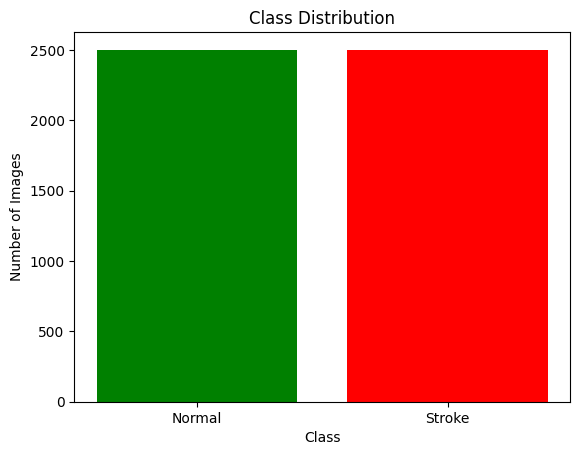

In [33]:
import matplotlib.pyplot as plt

plt.bar(['Normal', 'Stroke'], counts, color=['green', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# Observation:
- Here Class is Balanced

# Split the Data into Train & Test Set
- We split data so that:

1. The model learns from Training Data

2. We test the model performance on Testing Data (unseen images)

In [34]:
# Split the data into 80% Train and 20% Test
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)

Training Data Shape: (2000, 128, 128, 3)
Testing Data Shape: (501, 128, 128, 3)


#  What is a CNN Model?
- A Convolutional Neural Network is a neural network architecture that mimics the way the human brain processes visual data. It automatically learns to detect patterns like edges, textures, and shapes from images without the need for manual feature extraction.

# Build CNN Model (Brain Stroke Detection)
- Why CNN?     
          CNN (Convolutional Neural Network) is the best for image classification tasks.

In [35]:
model = Sequential()

# Convolution Layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(2, activation='softmax'))  # 2 classes: Stroke or Normal

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,578 (28.20 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

In [37]:
model.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=32)

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6107 - loss: 0.7872 - val_accuracy: 0.7150 - val_loss: 0.5290
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8489 - loss: 0.3571 - val_accuracy: 0.8550 - val_loss: 0.2898
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9415 - loss: 0.1641 - val_accuracy: 0.9300 - val_loss: 0.1847
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9610 - loss: 0.0932 - val_accuracy: 0.9500 - val_loss: 0.1852
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9848 - loss: 0.0621 - val_accuracy: 0.9500 - val_loss: 0.1680


# Evaluate the model

In [38]:
loss, accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9590 - loss: 0.1120
Test Loss: 0.13340026140213013
Test Accuracy: 0.9520958065986633


# Predict on New Images

In [39]:
predictions = model.predict(x_test)

print(predictions)  # Probability scores

# To get the class labels (Stroke/Normal)
predicted_classes = np.argmax(predictions, axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[6.8939310e-01 3.1060687e-01]
 [9.9950719e-01 4.9281266e-04]
 [9.9900985e-01 9.9012582e-04]
 ...
 [9.9998307e-01 1.6976437e-05]
 [9.9765259e-01 2.3474705e-03]
 [7.2600228e-01 2.7399769e-01]]


In [40]:
from tensorflow.keras.preprocessing import image

# Load Image
img = image.load_img('/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Normal/100 (12).jpg', target_size=(128, 128))

img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

# Predict
result = model.predict(img)

class_names = ['Normal', 'Stroke']

print("Predicted Output:", class_names[np.argmax(result)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Predicted Output: Normal


In [41]:
model.save("brain_stroke_detection_model.h5")

# Using Pre-trained Models (Transfer Learning)
TensorFlow provides many ready-made models trained on huge datasets like ImageNet.
We can use them for Brain Stroke Detection task.

# What is ResNet50?
ResNet50 is a deep convolutional neural network that is 50 layers deep. It’s part of the ResNet (Residual Network) family developed by Microsoft Research, and it's known for its ability to train very deep networks effectively.

It is widely used for image classification, object detection, and medical image analysis—like brain stroke detection project—because of its powerful feature extraction capability.

# ResNet50

In [42]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Normalize the Data (Very Important)
Since using ResNet50 → use preprocess_input()

In [47]:
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

# Convert Labels to Single Value Format

In [48]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# Using ResNet50
- Build the model

In [49]:
# Base Pre-trained Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Freeze Pre-trained layers
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 Classes
])
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,782,402 (105.98 MB)

 Trainable params: 4,194,690 (16.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [50]:
#model = Sequential([
#    base_model,
#    Flatten(),
#    Dense(128, activation='relu'),
#    Dropout(0.5),
#    Dense(1, activation='sigmoid')  # Single output for binary classification
#])

#model.summary()

# ✅ Notes:
## - If use Dense(2, activation='softmax'), then:

### 1. Your labels should be sparse_categorical_crossentropy or one-hot encoded + categorical_crossentropy.

## - If you use Dense(1, activation='sigmoid'), then:

### 2. Your labels must be binary (0 or 1) and use binary_crossentropy.

# compile the model

In [51]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [53]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step - accuracy: 0.5043 - loss: 1.4553 - val_accuracy: 0.6387 - val_loss: 0.6882
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6104 - loss: 0.6873 - val_accuracy: 0.6387 - val_loss: 0.6793
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6091 - loss: 0.6814 - val_accuracy: 0.6387 - val_loss: 0.6728
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6022 - loss: 0.6782 - val_accuracy: 0.6387 - val_loss: 0.6674
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6076 - loss: 0.6739 - val_accuracy: 0.6387 - val_loss: 0.6635


# Evaluate the model

In [54]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", accuracy)
print("Test Loss:", loss)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6546 - loss: 0.6589
Test Accuracy: 0.6387225389480591
Test Loss: 0.6634822487831116


# Test Predictions on New Images

In [55]:
img = image.load_img('/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Normal/100 (18).jpg', target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

img_array = img_array / 255.0

# Predict
pred_prob = model.predict(img_array)

# For binary with sigmoid:
#pred_class = "Stroke" if pred_prob[0][0] > 0.5 else "Normal"
# For 2-class softmax:
pred_class = ['Normal', 'Stroke'][np.argmax(pred_prob)]

print("Predicted Class:", pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Class: Normal


In [56]:
model.save('brain_stroke_resnet50.h5')

# VGG16

# What is VGG16?
VGG16 is a Convolutional Neural Network (CNN) model developed by the Visual Geometry Group (VGG) at the University of Oxford. The "16" in VGG16 stands for 16 weight layers (13 convolutional layers + 3 fully connected layers).

It became famous for its simplicity and effectiveness, especially during the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2014, where it performed remarkably well.

# Import necessary Libraries

In [57]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# ⚠️ Don’t Resplit Train Test before each model
## - That will shuffle and change which images are in train/test — and ruin consistency.

## Load Pre-trained VGG16 

In [58]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze all layers

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [59]:
#base_model.trainable = True

# Freeze first few layers and fine-tune the rest
#for layer in base_model.layers[:15]:
#    layer.trainable = False

-  Unfreeze Some Layers
- To fine-tune the model:
- Then re-compile and train again.

## Build the model

In [60]:
model = Sequential([
    base_model,               # Pre-trained VGG16 base
    Flatten(),               
    Dense(128, activation='relu'), 
    Dropout(0.5),             
    Dense(1, activation='sigmoid') 
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,763,521 (60.13 MB)

 Trainable params: 1,048,833 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Compile the model

In [61]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Train the model

In [62]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=32
)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.5278 - loss: 2.9991 - val_accuracy: 0.6387 - val_loss: 0.7016
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5143 - loss: 1.3010 - val_accuracy: 0.6387 - val_loss: 0.6662
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5596 - loss: 0.7152 - val_accuracy: 0.6387 - val_loss: 0.6630
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6197 - loss: 0.6651 - val_accuracy: 0.6387 - val_loss: 0.6593
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5969 - loss: 0.6744 - val_accuracy: 0.6387 - val_loss: 0.6562


## Evaluation

In [63]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6546 - loss: 0.6493
Test Accuracy: 0.6387225389480591
Test Loss: 0.656219482421875


# Test Prediction on new images

In [64]:
img = image.load_img('/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/58 (36).jpg', target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

img_array = img_array / 255.0

# Predict
pred_prob = model.predict(img_array)

# For binary with sigmoid:
pred_class = "Stroke" if pred_prob[0][0] > 0.5 else "Normal"
# For 2-class softmax:
#pred_class = ['Normal', 'Stroke'][np.argmax(pred_prob)]

print("Predicted Class:", pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Stroke


In [65]:
model.save('brain_stroke_vgg16.h5')

# Conclusion
- This project demonstrates the effectiveness of deep learning techniques in classifying brain stroke conditions using medical imaging data. By leveraging convolutional neural networks and transfer learning models such as ResNet50 and VGG16, the study highlights how AI can assist in the early and accurate detection of strokes from brain CT or MRI images. The approach not only reduces the dependency on manual diagnosis but also enhances the speed and reliability of medical assessments. With further refinement and integration into clinical workflows, such AI-based diagnostic tools have the potential to significantly improve patient outcomes and support medical professionals in critical decision-making.